In [1]:
#importing Keras, Library for deep learning 
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('matplotlib', matplotlib.__version__+'\n','keras:', keras.__version__+'\n','sklearn:', sklearn.__version__+'\n', 'pandas:' + pandas.__version__+'\n','numpy:'+ numpy.__version__+'\n')

Using TensorFlow backend.
/home/deepak/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# dataset https://www.kaggle.com/oddrationale/mnist-in-csv
# preprocessing data
trainData = pd.read_csv('/home/deepak/Desktop/deepWork/machineLearning/dataset/mnistData/mnist_train.csv')
testData = pd.read_csv('/home/deepak/Desktop/deepWork/machineLearning/dataset/mnistData/mnist_test.csv')

In [3]:
print(trainData.shape, testData.shape)   

(60000, 785) (10000, 785)


In [9]:
data = trainData.append(testData)
data.shape

(70000, 785)

In [10]:
# Reshapping the data because data is in rows and we need matrix for computation
# Convert into 28*28*1 using reshape fun (1 because it contains only blackandWhite)
# Unsigned integer (0 to 255)
data.iloc[1, 1:].values.reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
#Storing Pixel array in form length width and channel in df_x
df_x = data.iloc[:,1:].values.reshape(len(data), 28, 28, 1)
# storing labels in y
y = data.iloc[:, 0].values

In [12]:
# now y conatins 0...9 which may have relationship among them
# like our model may refer 2 = 2*1
# so we will convert it into categorical vectors
# like 0 will be [1 0 0 ...0], 1 = [0 1 0 .... 0]
#Converting labels to categorical features

df_y = keras.utils.to_categorical(y,num_classes=10)

In [13]:
df_y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [14]:
df_x  =  np.array(df_x)
df_y  =  np.array(df_y)

In [15]:
df_x.shape

(70000, 28, 28, 1)

In [16]:

# test train split# test t 
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)
# done with preprocessing

In [17]:

#CNN model#CNN mod 
model = Sequential()
# 32 filter 3*3 size
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
# reduce number of parameters by getting imporatant params
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # converts all matrix to single vector
model.add(Dense(100))    #100 NN nodes 
model.add(Dropout(0.5))
model.add(Dense(10))     #output on NN will have 10 node as our output will be categorical nodes
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy']) # chose loss fun

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total para

In [19]:
model.fit(x_train, y_train, epochs=30, validation_data = (x_test, y_test) )

Train on 56000 samples, validate on 14000 samples
Epoch 1/30
56000/56000 [==============================] - 48s 849us/step - loss: 9.2146 - acc: 0.4263 - val_loss: 7.5909 - val_acc: 0.5282
Epoch 2/30
56000/56000 [==============================] - 46s 826us/step - loss: 7.4869 - acc: 0.5336 - val_loss: 5.8560 - val_acc: 0.6350
Epoch 3/30
56000/56000 [==============================] - 47s 834us/step - loss: 5.5506 - acc: 0.6533 - val_loss: 3.5318 - val_acc: 0.7793
Epoch 4/30
56000/56000 [==============================] - 56s 994us/step - loss: 3.6200 - acc: 0.7732 - val_loss: 2.2944 - val_acc: 0.8556
Epoch 5/30
56000/56000 [==============================] - 49s 882us/step - loss: 2.6303 - acc: 0.8347 - val_loss: 1.8088 - val_acc: 0.8867
Epoch 6/30
56000/56000 [==============================] - 57s 1ms/step - loss: 2.3685 - acc: 0.8512 - val_loss: 1.4719 - val_acc: 0.9078
Epoch 7/30
56000/56000 [==============================] - 56s 997us/step - loss: 2.1549 - acc: 0.8647 - val_loss: 1.50

In [20]:
# evaluate model on test and train data
model.evaluate(x_test,y_test)

14000/14000 [==============================] - 3s 212us/step


[0.63279334991252312, 0.96021428571428569]

In [21]:
# save model so that we can use it later.
model.save('model.h5')

----before reshape (28, 28) [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   

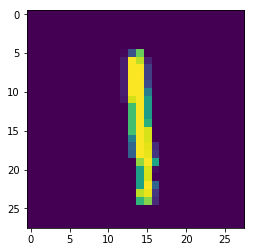

In [28]:
index = 8
testImg = trainData.iloc[index:(index+1), 1:]
img = testImg.values.reshape(28, 28)
print('----before reshape', img.shape, img)
plt.imshow(img)
plt.show()
img = img.reshape(1, 28, 28, 1).astype('uint8')

In [27]:
predicted = model.predict(img)
predicted = np.argmax(predicted, axis=None, out=None)
defined = trainData.iloc[index:(index+1), 0:1].values
defined = np.squeeze(defined)
print('predicted digit:', predicted,'digit in csv:', defined)

predicted digit: 1 digit in csv: 1
